## 1. FastFeatureDetector feature detection

### 1.1 FastFeatureDetector feature detection 1

In [1]:
import cv2
import numpy as np
 
src = cv2.imread('./data/chessBoard.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

#1
##fastF = cv2.FastFeatureDetector_create()
##fastF =cv2.FastFeatureDetector.create()
fastF =cv2.FastFeatureDetector.create(threshold=30) # 100
kp = fastF.detect(gray) 
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))
print('len(kp)=', len(kp))
cv2.imshow('dst',  dst)

#2
fastF.setNonmaxSuppression(False)
kp2 = fastF.detect(gray)
dst2 = cv2.drawKeypoints(src, kp2, None, color=(0,0,255))
print('len(kp2)=', len(kp2))
cv2.imshow('dst2',  dst2)

#3
dst3 = src.copy()
points = cv2.KeyPoint_convert(kp)
for cx, cy in points:
    cv2.circle(dst3, (cx, cy), 3, color=(255, 0, 0), thickness=1)
cv2.imshow('dst3',  dst3)
cv2.waitKey()
cv2.destroyAllWindows()

len(kp)= 98
len(kp2)= 867


### 1.2 FastFeatureDetector feature detection 2: feature sorting, filtering

In [2]:
import cv2
import numpy as np
 
src = cv2.imread('./data/chessBoard.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

#1
fastF = cv2.FastFeatureDetector_create()
kp = fastF.detect(gray) 
dst = cv2.drawKeypoints(gray, kp, None, color=(255,0,0))
print('len(kp)=', len(kp))

#2
kp = sorted(kp, key=lambda f: f.response, reverse=True)
cv2.drawKeypoints(gray, kp[:10], dst, color=(0,0,255),
                 flags = cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
cv2.imshow('dst',  dst)

#3
kp2 = list(filter(lambda f: f.response>50, kp))
print('len(kp2)=', len(kp2))
##for f in kp2:
##    print(f.response)

dst2 = cv2.drawKeypoints(gray, kp2, None, color=(0,0,255))   
cv2.imshow('dst2',  dst2)

#4
def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])

kp3 = filteringByDistance(kp2, 30)
print('len(kp3)=', len(kp3))
dst3 = cv2.drawKeypoints(gray, kp3, None, color=(0,0,255))
cv2.imshow('dst3',  dst3)
cv2.waitKey()
cv2.destroyAllWindows()

len(kp)= 167
len(kp2)= 91
len(kp3)= 38


## 2. MSER(Maximally Stable Extremal Regions) feature detection

In [3]:
import cv2
import numpy as np
 
src = cv2.imread('./data/chessBoard.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

#1
mserF = cv2.MSER_create(10)  # cv2.MSER.create(10)
kp= mserF.detect(gray)
print('len(kp)=', len(kp))
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))
cv2.imshow('dst',  dst)

#2
dst2 = dst.copy()
regions, bboxes = mserF.detectRegions(gray)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
cv2.polylines(dst2, hulls, True, (0, 255, 0))
cv2.imshow('dst2',  dst2)

#3
dst3 = dst.copy()
for i, pts in enumerate(regions):
    box = cv2.fitEllipse(pts)
    cv2.ellipse(dst3, box,  (255,0,0),1)
    x, y, w, h = bboxes[i]
    cv2.rectangle(dst3, (x, y), (x+w, y+h), (0,255,0))     
cv2.imshow('dst3',  dst3)
cv2.waitKey()
cv2.destroyAllWindows()

len(kp)= 202


## 3. SimpleBlobDetector feature detection

In [4]:
import cv2
import numpy as np
 
src = cv2.imread('./data/chessBoard.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

#1
params = cv2.SimpleBlobDetector_Params()
params.blobColor = 0
params.thresholdStep = 5
params.minThreshold = 20
params.maxThreshold = 100
params.minDistBetweenBlobs = 5
params.filterByArea = True
params.minArea = 25
params.maxArea = 5000
params.filterByConvexity = True
params.minConvexity = 0.89

#2
##blobF = cv2.SimpleBlobDetector.create(params)
##blobF = cv2.SimpleBlobDetector_create(params)
blobF = cv2.SimpleBlobDetector_create()
kp= blobF.detect(gray)
print('len(kp)=', len(kp))
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))

#3
for f in kp:
    r = int(f.size/2)
    cx, cy = f.pt
    cv2.circle(dst, (round(cx),round(cy)),r,(0,0,255),2)
    
cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()

len(kp)= 14


## 4. GFTT(cv2.goodFeaturesToTrack)Detector feature detection

In [5]:
import cv2
import numpy as np
 
src = cv2.imread('./data/chessBoard.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

#1
##goodF = cv2.GFTTDetector.create()
goodF = cv2.GFTTDetector_create()
kp= goodF.detect(gray)
print('len(kp)=', len(kp))
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))   
cv2.imshow('dst',  dst)

#2
goodF2 = cv2.GFTTDetector_create(maxCorners= 50,
                                qualityLevel=0.1,
                                minDistance = 10,
                                useHarrisDetector=True)
kp2= goodF2.detect(gray)
print('len(kp2)=', len(kp2))
dst2 = cv2.drawKeypoints(gray, kp2, None, color=(0,0,255))   
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()

len(kp)= 114
len(kp2)= 38


## 5. ORB(oriented BRIEF{Binary Robust Independent Elementary Features}) feature detection and descriptor calculation

### 5.1 ORB feature detection and descriptor calculation

In [6]:
import cv2
import numpy as np
#1
def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])

#2
src = cv2.imread('./data/CornerTest.jpg')
##src = cv2.imread('./data/chessBoard.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

##orbF = cv2.ORB_create()           # HARRIS_SCORE
orbF = cv2.ORB_create(scoreType=1)  # FAST_SCORE
kp= orbF.detect(gray)
print('len(kp)=', len(kp))
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))   
cv2.imshow('dst',  dst)

#3
kp = sorted(kp, key=lambda f: f.response, reverse=True)
filtered_kp = list(filter(lambda f: f.response>50, kp))
filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))

kp, des = orbF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des=', des)

#4
dst2 = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst2, [box], True, (0,255,0), 2)
    cv2.circle(dst2, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()

len(kp)= 63
len(filtered_kp)= 8
des.shape= (8, 32)
des= [[ 72  48  56  96  33  77  81  16 105 168  52   8 159  23  64  50 132 213
  221   8 136  96 240   0 195 249  33  48  66 128  67  35]
 [104  48  56  96  33  77  81  16 105 168  52   8 159  23  64  50 132 212
   93   8 136  96 240   0 195 217  33  48  66 128  66  35]
 [  2 141   2 158  20 131 174 230  22   0  90   2  96 234  48  64  89 106
   19 193   2 184   8 255  40  38 138 128  20  10  48 136]
 [  2 141   2 158  20 131 174 230  22   0  88   2  32 234  48  64  89 106
   19 193   2 184  10 255  40  38 138 136  20  10  48 136]
 [  2 141   2 158  20 131 174 230  22   1  88   2  32 234  48  64  89 106
   19 193   2 184   8 255  40  38 138 128  20  10  48 136]
 [  2 141   2 158  20 131 174 230  22   0  90   2  96 234  48  64  89 106
   19 193   2 184  10 255  40  38 138 128  20  10 176 136]
 [  2 140   2 154  84 131 170 238  22   1  88   2  96 232  56  64 121 106
   19 129  34 186  10 255  40  38 155 136  21  10  48 136]
 [  2 141   2

### 5.2 ORB descriptor calculation of other feature detector

In [7]:
import cv2
import numpy as np

#1
def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])
    
#2
src = cv2.imread('./data/chessBoard.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

fastF = cv2.FastFeatureDetector_create(threshold=30)
mserF = cv2.MSER_create(10)
blobF = cv2.SimpleBlobDetector_create()
goodF = cv2.GFTTDetector_create(maxCorners= 20,minDistance = 10)

kp= fastF.detect(gray)
##kp= mserF.detect(gray)
##kp= blobF.detect(gray)
##kp= goodF.detect(gray)
print('len(kp)=', len(kp))

filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))
dst = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))   
cv2.imshow('dst',  dst)

#3
orbF = cv2.ORB_create()
filtered_kp, des = orbF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des=', des)

dst2 = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst2, [box], True, (0,255,0), 2)
    cv2.circle(dst2, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
    
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()

len(kp)= 90
len(filtered_kp)= 38
des.shape= (38, 32)
des= [[ 14 156 176 ...  84 141 207]
 [ 15  65  83 ... 179 113 160]
 [ 14 152 176 ...  69  13 198]
 ...
 [114 168 242 ... 200 242 138]
 [ 57   3 231 ... 232 112  49]
 [242 164 218 ... 200 250 138]]


## 6. BRISK(Binary Robust Invariant Scalable Keypoints) feature detection and descriptor calculation

### 6.1 BRISK feature detection and descriptor calculation

In [8]:
import cv2
import numpy as np

#1
def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])
    
#2
src = cv2.imread('./data/CornerTest.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

briskF = cv2.BRISK_create()
kp= briskF.detect(gray)
print('len(kp)=', len(kp))
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))   
cv2.imshow('dst',  dst)

#3
kp = sorted(kp, key=lambda f: f.response, reverse=True)
filtered_kp = list(filter(lambda f: f.response>50, kp))
filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))

kp, des = briskF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des=', des)

#4
dst2 = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst2, [box], True, (0,255,0), 2)
    cv2.circle(dst2, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
    
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()

len(kp)= 27
len(filtered_kp)= 8
des.shape= (8, 64)
des= [[254 191 247 241 112   0   0   0 193 199  31 255 240 195  14  48 248  96
  133  51 140 227  16   6   0   0  32 227  25  39  60 225   0   1   0   0
    0   3 128  80 198  25   3   0   0   0   0   0   0  96  50  63 143 195
  193 195 225 115 120 125  27  13   0   0]
 [248 255 255 247 243 224   0   0   0 134  31 255 255 255 254 243 143 127
  252 253 143 255  61 142 131   3   0   0   0 108 252 227  15  29 240 128
    7 220 254 128 135  16  18  49  51   6   0   0 218 239  50  17   0  12
    0   8   0 130  64  32   0   0   0   0]
 [128 251 255 231 225   0   0   0   0   0   0   0   0 199  61 255 255 255
  205  35  12   0   0   0   0   0   0   0   0   0 112 231  57 239 252 243
  159  61 195  24 198   0   0   0   0   0   0   0   0 128 247 247 255  85
   78   0 144 107  96   0   0   0   0   0]
 [128 255 207 227   0   0   0   0   0   0   0 224 112 199 255 255 191 249
  192   1   0   0   0   0   0   0   0   0   0   0   0 128  25 127 254 185
 

### 6.2 BRISK descriptor calculation of other feature detector

In [9]:
import cv2
import numpy as np

#1
def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])
    
#2
src = cv2.imread('./data/chessBoard.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

fastF = cv2.FastFeatureDetector_create(threshold=30)
mserF = cv2.MSER_create(10)
blobF = cv2.SimpleBlobDetector_create()
goodF = cv2.GFTTDetector_create(maxCorners= 20,minDistance = 10)

kp= fastF.detect(gray)
##kp= mserF.detect(gray)
##kp= blobF.detect(gray)
##kp= goodF.detect(gray)
print('len(kp)=', len(kp))

filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))
dst = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))   
cv2.imshow('dst',  dst)

#3
briskF = cv2.BRISK_create()
filtered_kp, des = briskF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des=', des)

dst2 = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst2, [box], True, (0,255,0), 2)
    cv2.circle(dst2, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
    
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()

len(kp)= 90
len(filtered_kp)= 38
des.shape= (38, 64)
des= [[252 255 239 ... 141  25  50]
 [252 255 255 ... 141  25   0]
 [252 255 239 ... 141  25  50]
 ...
 [252 255 239 ... 141 153   2]
 [252 255 255 ...  13 136 137]
 [252 255 239 ... 141 153  50]]


## 7. KAZE, AKAZE feature detection and descriptor calculation

In [10]:
import cv2
import numpy as np

#1
def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])
    
#2
src = cv2.imread('./data/CornerTest.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

kazeF = cv2.KAZE_create()
akazeF = cv2.AKAZE_create()
kp= kazeF.detect(gray)
##kp= akazeF.detect(gray)
print('len(kp)=', len(kp))
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))   
cv2.imshow('dst',  dst)

#3
kp = sorted(kp, key=lambda f: f.response, reverse=True)
##filtered_kp = list(filter(lambda f: f.response>0.01, kp))
filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))

kp, des = kazeF.compute(gray, filtered_kp)
##kp, des =akazeF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des.dtype=', des.dtype)
#print('des=', des)

#4
dst2 = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst2, [box], True, (0,255,0), 2)
    cv2.circle(dst2, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
    
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()

len(kp)= 24
len(filtered_kp)= 8
des.shape= (8, 64)
des.dtype= float32


## 8. SIFT(Scale Invariant Feature Transform) feature detection and descriptor calculation

In [11]:
import cv2
import numpy as np

#1
def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])
    
#2
src = cv2.imread('./data/CornerTest.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

##siftF = cv2.xfeatures2d.SIFT_create()
siftF = cv2.xfeatures2d.SIFT_create(edgeThreshold = 80)
kp= siftF.detect(gray)
print('len(kp)=', len(kp))

#3
kp = sorted(kp, key=lambda f: f.response, reverse=True)
##filtered_kp = list(filter(lambda f: f.response>0.01, kp))
filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))

kp, des = siftF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des.dtype=', des.dtype)
print('des=', des)

#4
dst = cv2.drawKeypoints(src, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst, [box], True, (0,255,0), 2)
    cv2.circle(dst, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
    
cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()

len(kp)= 26
len(filtered_kp)= 14
des.shape= (14, 128)
des.dtype= float32
des= [[  0.   0.   0. ...   0.   0.   0.]
 [  2.  12.   7. ...   0.   0.   1.]
 [  0.   0.   0. ...   0.   0.   1.]
 ...
 [  9.  30. 152. ...   0.   0.   0.]
 [  2.  24. 164. ...   0.   0.   0.]
 [  3. 112. 160. ...   0.   0.   0.]]


## 9. SURF(Speeded Up Robust Features) feature detection and descriptor calculation

In [12]:
import cv2
import numpy as np

#1
def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])
    
#2
src = cv2.imread('./data/CornerTest.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
#gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

surF = cv2.xfeatures2d.SURF_create()
##surF = cv2.xfeatures2d.SURF_create(upright=True)
kp= surF.detect(gray)
print('len(kp)=', len(kp))

#3
kp = sorted(kp, key=lambda f: f.response, reverse=True)
##filtered_kp = list(filter(lambda f: f.response>0.01, kp))
filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))

kp, des = surF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des.dtype=', des.dtype)
##print('des=', des)

#4
dst = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst, [box], True, (0,255,0), 2)
    cv2.circle(dst, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
    
cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()

len(kp)= 33
len(filtered_kp)= 22
des.shape= (22, 64)
des.dtype= float32


## 10. Feature matching with descriptor

### 10.1 BFMatcher/FlannBasedMatcher/DescriptorMatcher.match(des1, des2) using Binary descriptor(ORB, BRISK)

In [13]:
import cv2
import numpy as np

#1    
src1 = cv2.imread('./data/book1.jpg') # 'cup1.jpg'
src2 = cv2.imread('./data/book2.jpg') # 'cup2.jpg'
img1= cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
img2= cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)

#2-1
orbF   = cv2.ORB_create(nfeatures=1000)
kp1, des1 = orbF.detectAndCompute(img1, None)
kp2, des2 = orbF.detectAndCompute(img2, None)

#2-2
##briskF = cv2.BRISK_create()
##kp1, des1 = briskF.detectAndCompute(img1, None)
##kp2, des2 = briskF.detectAndCompute(img2, None)

#3-1
bf = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
	
#3-2
##flan = cv2.FlannBasedMatcher_create() 
##matches = flan.match(np.float32(des1),np.float32(des2))
	
#4  
matches = sorted(matches, key = lambda m: m.distance)
print('len(matches)=', len(matches))
for i, m in enumerate(matches[:3]):
        print('matches[{}]=(queryIdx:{}, trainIdx:{}, distance:{})'.format(
            i, m. queryIdx, m.trainIdx, m.distance))
	
minDist = matches[0].distance
good_matches = list(filter(lambda m: m.distance<4*minDist, matches))
print('len(good_matches)=', len(good_matches))
if len(good_matches) < 5:
    print('sorry, too small good matches')
    exit()
    
dst = cv2.drawMatches(img1,kp1,img2,kp2,good_matches, None, flags=2)
cv2.imshow('dst',  dst)

#5
src1_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches])
src2_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches])

H, mask = cv2.findHomography(src1_pts, src2_pts, cv2.RANSAC, 3.0)#cv2.LMEDS
mask_matches = mask.ravel().tolist() # list(mask.flatten())

#6
h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
pts2 = cv2.perspectiveTransform(pts, H)
src2 = cv2.polylines(src2,[np.int32(pts2)],True,(255,0, 0),2)
        
draw_params=dict(matchColor = (0,255,0), singlePointColor = None,
                 matchesMask = mask_matches,  flags = 2)                 
dst2 = cv2.drawMatches(src1,kp1,src2,kp2, good_matches, None,**draw_params)  

cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()

len(matches)= 499
matches[0]=(queryIdx:254, trainIdx:183, distance:10.0)
matches[1]=(queryIdx:418, trainIdx:252, distance:12.0)
matches[2]=(queryIdx:450, trainIdx:389, distance:15.0)
len(good_matches)= 108


### 10.2 BFMatcher/FlannBasedMatcher/DescriptorMatcher.knnMatch(des1, des2, k=2) using SIFT, SURF features

In [14]:
import cv2
import numpy as np
    
#1
src1 = cv2.imread('./data/book1.jpg')
src2 = cv2.imread('./data/book2.jpg')
img1= cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
img2= cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)

#2-1
siftF = cv2.xfeatures2d.SIFT_create()
kp1, des1 = siftF.detectAndCompute(img1, None)
kp2, des2 = siftF.detectAndCompute(img2, None)

#2-2
##surF = cv2.xfeatures2d.SURF_create()
##kp1, des1 = surF.detectAndCompute(img1, None)
##kp2, des2 = surF.detectAndCompute(img2, None)

#3-1
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
	
#3-2
##flan = cv2.FlannBasedMatcher_create() 
##matches = flan.knnMatch(des1,des2, k=2)

#3-3
print('len(matches)=', len(matches))
for i, m in enumerate(matches[:3]):
    for j, n in enumerate(m):
        print('matches[{}][{}]=(queryIdx:{}, trainIdx:{}, distance:{})'.format(
            i, j, n. queryIdx, n.trainIdx, n.distance))
dst = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,flags=0)
##cv2.imshow('dst',  dst)

#4
nndrRatio = 0.45
##good_matches = []
##for f1, f2 in matches: # k = 2
##    if f1.distance < nndrRatio*f2.distance:
##        good_matches.append(f1)
good_matches = [f1 for f1, f2 in matches
                   if f1.distance < nndrRatio*f2.distance]
print('len(good_matches)=', len(good_matches))
if len(good_matches) < 5:
    print('sorry, too small good matches')
    exit()

#5
src1_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches])
src2_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches])

H, mask = cv2.findHomography(src1_pts, src2_pts, cv2.RANSAC, 2.0)#cv2.LMEDS
mask_matches = mask.ravel().tolist() # list(mask.flatten())

#6
h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
pts2 = cv2.perspectiveTransform(pts, H)
src2 = cv2.polylines(src2,[np.int32(pts2)],True,(255,0, 0),2)
        
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = None,
                   matchesMask = mask_matches, flags = 2)                 
dst2 = cv2.drawMatches(src1,kp1,src2,kp2, good_matches, None,**draw_params)

cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()

len(matches)= 597
matches[0][0]=(queryIdx:0, trainIdx:198, distance:305.919921875)
matches[0][1]=(queryIdx:0, trainIdx:541, distance:317.4192810058594)
matches[1][0]=(queryIdx:1, trainIdx:542, distance:297.1666259765625)
matches[1][1]=(queryIdx:1, trainIdx:467, distance:302.2664489746094)
matches[2][0]=(queryIdx:2, trainIdx:403, distance:383.37841796875)
matches[2][1]=(queryIdx:2, trainIdx:196, distance:404.24249267578125)
len(good_matches)= 136


### 10.3 BFMatcher/FlannBasedMatcher/DescriptorMatcher.radiusMatch(des1, des2, maxDistance=0.3) using SURF features

In [15]:
import cv2
import numpy as np
    
#1
src1 = cv2.imread('./data/book1.jpg')
src2 = cv2.imread('./data/book2.jpg')
img1= cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
img2= cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)

#2
surF = cv2.xfeatures2d.SURF_create()
kp1, des1 = surF.detectAndCompute(img1, None)
kp2, des2 = surF.detectAndCompute(img2, None)
print('len(kp1)=', len(kp1))
print('len(kp2)=', len(kp2))

#3
##bf = cv2.BFMatcher()
##matches = bf.radiusMatch(des1,des2, maxDistance=0.3)
flan = cv2.FlannBasedMatcher_create() 
matches = flan.radiusMatch(des1,des2, maxDistance=0.3)

#4
def draw_key2image(kp, img):
    x, y = kp.pt
    size = kp.size
    rect = ((x, y), (size, size), kp.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(img, [box], True, (0,255,0), 2)
    cv2.circle(img, (round(x), round(y)), round(size/2), (255,0,0), 2)
##  return img  
    
for i, radius_match in enumerate(matches):
    if len(radius_match) != 0:
        print('i=', i)
        print('len(matches[{}])={}'.format(i,len(matches[i])))#len(radius_match)
        src1c = src1.copy()
        draw_key2image(kp1[radius_match[0].queryIdx], src1c)
        src2c = src2.copy()

        for m in radius_match:
            draw_key2image(kp2[m.trainIdx], src2c)
            
        dst = cv2.drawMatches(src1c,kp1,src2c,kp2,radius_match, None,flags=2)
        cv2.imshow('dst',  dst)
        
        key = cv2.waitKey()
        if key == 27: # Esc
            break

cv2.waitKey()
cv2.destroyAllWindows()

len(kp1)= 790
len(kp2)= 1984
i= 0
len(matches[0])=1
i= 1
len(matches[1])=2
i= 2
len(matches[2])=4
i= 3
len(matches[3])=1
i= 4
len(matches[4])=1


### 10.4 BFMatcher/FlannBasedMatcher/DescriptorMatcher.radiusMatch(des1, des2, maxDistance=0.3) using SURF features

In [16]:
import cv2
import numpy as np
    
#1
src1 = cv2.imread('./data/book1.jpg')
src2 = cv2.imread('./data/book2.jpg')
img1= cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
img2= cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)

#2
surF = cv2.xfeatures2d.SURF_create()
kp1, des1 = surF.detectAndCompute(img1, None)
kp2, des2 = surF.detectAndCompute(img2, None)
print('len(kp1)={}, len(kp2)={}'.format(len(kp1), len(kp2)))

#3
distT = 0.1
##bf = cv2.BFMatcher()
##matches = bf.radiusMatch(des1,des2,  maxDistance=distT)
flan = cv2.FlannBasedMatcher_create() 
matches = flan.radiusMatch(des1,des2,  maxDistance=distT)
print('len(matches)=', len(matches))
    
#4
good_matches = []
for i, radius_match in enumerate(matches):
    
#4-1    
##    if len(radius_match) != 0:
##        sort_match = sorted(radius_match, key = lambda m: m.distance)
##        good_matches.append(sort_match[0])

#4-2
    if len(radius_match) != 0:
        for m in radius_match:
            good_matches.append(m)

print('len(good_matches)=', len(good_matches))
##dst2 = cv2.drawMatches(img1,kp1,img2,kp2,good_matches, None, flags=2)
####cv2.imshow('dst2',  dst2)

#5
src1_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches])
src2_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches])

H, mask = cv2.findHomography(src1_pts, src2_pts, cv2.RANSAC, 3.0)#cv2.LMEDS
mask_matches = mask.ravel().tolist() # list(mask.flatten())

#6
h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
pts2 = cv2.perspectiveTransform(pts, H)
src2 = cv2.polylines(src2,[np.int32(pts2)],True,(255,0, 0),2)
        
draw_params=dict(matchColor = (0,255,0), singlePointColor = None,
                 matchesMask = mask_matches,  flags = 2)                 
dst3 = cv2.drawMatches(src1,kp1,src2,kp2, good_matches, None,**draw_params)
cv2.imshow('dst3',  dst3)

cv2.waitKey()
cv2.destroyAllWindows()

len(kp1)=790, len(kp2)=1984
len(matches)= 790
len(good_matches)= 62


## 11. HOG(Histogram of Oriented Gradients) descriptor

### 11.1 HOG descriptor calculation

des1.shape= (3780, 1)
des1= [[0.01308054]
 [0.00584509]
 [0.04909251]
 ...
 [0.04155609]
 [0.02162938]
 [0.08109097]]
des2.shape= (3780, 1)
des2= [[0.01308054]
 [0.00584509]
 [0.04909251]
 ...
 [0.04155609]
 [0.02162938]
 [0.08109097]]
des3.shape= (3780, 1)
des3= [[0.00893402]
 [0.01081526]
 [0.02545158]
 ...
 [0.0347785 ]
 [0.03489022]
 [0.08337955]]


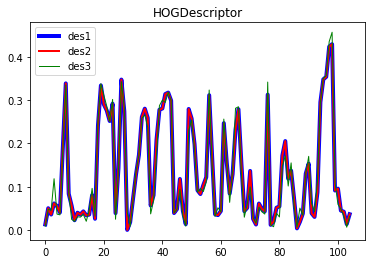

In [17]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

src = cv2.imread('./data/people1.png')

#1: HoG in color image
hog1 = cv2.HOGDescriptor()
des1 = hog1.compute(src)
print('des1.shape=', des1.shape)
print('des1=', des1)

#2: HoG in color image
winSize     = (64,128)
blockSize   = (16,16)
blockStride = (8,8)
cellSize    = (8,8)
nbins       = 9
derivAperture = 1
winSigma = -1  # 4.0
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = True
nlevels = 64
signedGradient = False 
hog2 = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,
                         derivAperture,winSigma,
                         histogramNormType,L2HysThreshold,
                         gammaCorrection,nlevels, signedGradient)
des2 = hog2.compute(src)
print('des2.shape=', des2.shape)
print('des2=', des2)

#3 HoG in grayscale image
gray  = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
des3 = hog1.compute(gray)
##des3 = hog2.compute(gray)
print('des3.shape=', des3.shape)
print('des3=', des3)

#4
plt.title('HOGDescriptor')
plt.plot(des1[::36], color='b',linewidth=4,label='des1')
plt.plot(des2[::36], color='r',linewidth=2,label='des2')
plt.plot(des3[::36], color='g',linewidth=1,label='des3')
plt.legend(loc='best')
plt.show()

### 11.2 human detection using HOG features

In [18]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

#1
src = cv2.imread('./data/people.png')
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

#2
loc1, weights1 = hog.detect(src)
print('len(loc1)=',len(loc1))
dst1 = src.copy()
w, h = hog.winSize
for pt in loc1:
    x, y = pt
    cv2.rectangle(dst, (x, y), (x+w, y+h), (255,0,0),2)
cv2.imshow('dst1',  dst1)

#2
dst2 = src.copy()
loc2, weights2 = hog.detectMultiScale(src)
print('len(loc2)=',len(loc2))
for rect in loc2:
    x, y, w, h = rect
    cv2.rectangle(dst2, (x, y), (x+w, y+h), (0,255,0),2)
cv2.imshow('dst2',  dst2)

#3
dst3 = src.copy()
loc3, weights3 = hog.detectMultiScale(src, winStride=(1,1), padding=(8,8))
print('len(loc3)=',len(loc3))
print('weights3=', weights3)
for i, rect in enumerate(loc3):
    x, y, w, h = rect
    if weights3[i]>0.5:
        cv2.rectangle(dst3, (x, y), (x+w, y+h), (0,0,255),2)
    else:
        cv2.rectangle(dst3, (x, y), (x+w, y+h), (255,0,0),2)
    
cv2.imshow('dst3',  dst3)
cv2.waitKey()
cv2.destroyAllWindows()

len(loc1)= 0
len(loc2)= 3
len(loc3)= 6
weights3= [[2.49923769]
 [2.40610972]
 [3.82788089]
 [1.13816947]
 [0.64257284]
 [0.37325623]]


## 12. Image stitching

### 12.1 image stitching 1

In [19]:
import cv2

src1 = cv2.imread('./data/stitch_image1.jpg')
src2 = cv2.imread('./data/stitch_image2.jpg')
src3 = cv2.imread('./data/stitch_image3.jpg')
src4 = cv2.imread('./data/stitch_image4.jpg')

stitcher = cv2.createStitcher()
status, dst = stitcher.stitch((src1, src2, src3, src4))
cv2.imwrite('./data/stitch_out.jpg', dst)
cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()

### 12.2 image stitching 2

In [20]:
import cv2

#1
src1 = cv2.imread('./data/stitch_image1.jpg')
src2 = cv2.imread('./data/stitch_image2.jpg')
src3 = cv2.imread('./data/stitch_image3.jpg')
src4 = cv2.imread('./data/stitch_image4.jpg')

stitcher = cv2.createStitcher()
status, dst2 = stitcher.stitch((src1, src2))
status, dst3 = stitcher.stitch((dst2, src3))
status, dst4 = stitcher.stitch((dst3, src4))

cv2.imshow('dst2',  dst2)
cv2.imshow('dst3',  dst3)
cv2.imshow('dst4',  dst4)
cv2.waitKey()
cv2.destroyAllWindows()

### 12.3 video stitching

In [21]:
import cv2
 
#1
cap = cv2.VideoCapture('./data/stitch_videoInput.mp4')
t = 0 
images = []
STEP = 20

while True:
    t += 1
    retval, frame = cap.read()
    if not retval:
        break
    img = cv2.resize(frame, dsize=(640, 480))
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    if t%STEP == 0:
        images.append(img)
        
    cv2.imshow('img',img)
    key = cv2.waitKey(25)
    if key == 27: # Esc
        break

#2
print('len(images)=', len(images))
stitcher = cv2.createStitcher()
status, dst = stitcher.stitch(images)
if status == cv2.STITCHER_OK:
    cv2.imwrite('./data/video_stitch_out.jpg', dst)
    cv2.imshow('dst',dst)
    cv2.waitKey()

if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()

len(images)= 7
